In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# 평균 제곱 오차
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [40]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


In [41]:
# 교차 엔트로피 오차
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

# log(0)은 inf기 때문에 임의의 작은 값 delta를 더함

In [42]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


In [43]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [44]:
train_size = x_train.shape[0]
print("train_size: ", train_size)
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(len(x_batch))
print(len(t_batch))

train_size:  60000
[ 8707 36733 50189 47272 30765 44535 48976 36706  8069 39603]
10
10


In [45]:
#배치용 교차 엔트로피 구현
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+ 1e-7)) / batch_size

In [46]:
# 원 핫 인코딩이 아닌 숫자 레이블로 주어졌을 때 엔트로피 오차
def cross_entropy_error(y,t):
    if y.dim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 수지해석

In [47]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [48]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

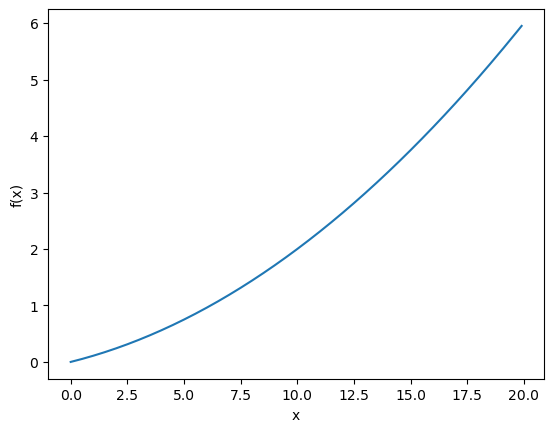

In [49]:

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [50]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [51]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [52]:
# 경사 하강법
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [53]:
def function_2(x):
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0, 4.0])
gradient_Descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [54]:
#학습률이 너무 큰 경우
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x =init_x, lr=10.0, step_num =100)

array([-2.58983747e+13, -1.29524862e+12])

In [55]:
# 학습률이 너무 작은 경우
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x =init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

### 신경망에서의 기울기

In [57]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [58]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss
    

In [64]:
net = simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)


[[ 0.14808295 -1.10999296 -0.60324929]
 [ 1.50696988  1.57118965  0.94031278]]
[1.44512266 0.7480749  0.48433192]


In [66]:
np.argmax(p)

0

In [67]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.5924043814563602

In [68]:
def f(W):
    return net.loss(x, t)

In [69]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.31903953  0.15889876 -0.47793829]
 [ 0.4785593   0.23834814 -0.71690744]]


In [71]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.31903953  0.15889876 -0.47793829]
 [ 0.4785593   0.23834814 -0.71690744]]


### 학습 알고리즘 구현하기
<br>
1단계 - 미니배치<br>
    훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표다.<br>
2단계 - 기울기 산출<br>
    미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게하는 방향을 제시한다.<br>
3단계 - 배개변수 갱신<br>
    가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.<br>
4단계 - 반복<br>
    1~3단계를 반복한다<br>

In [72]:
# 2층 신경망 클래스 구현하기
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params["W1"])
        grads['b1'] = numerical_gradient(loss_W, self.params["b1"])
        grads['W2'] = numerical_gradient(loss_W, self.params["W2"])
        grads['b2'] = numerical_gradient(loss_W, self.params["b2"])
        
        return grads
    

In [74]:
net = TwoLayerNet(input_size = 784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [76]:
x = np.random.rand(100, 784)
print(x.shape)
y = net.predict(x)
print(y)

(100, 784)
[[0.09384111 0.10398323 0.09945715 0.09384104 0.09507535 0.09957715
  0.10611823 0.10743726 0.09707705 0.10359243]
 [0.0939586  0.10336803 0.0994615  0.09423509 0.09529679 0.0993669
  0.10633393 0.1069881  0.09742987 0.10356119]
 [0.09385723 0.10396732 0.09986841 0.09411089 0.09504818 0.09939525
  0.10654024 0.10679132 0.09713631 0.10328486]
 [0.09368675 0.10397729 0.09991561 0.0937595  0.09549499 0.09899728
  0.10607223 0.10709257 0.09747485 0.10352892]
 [0.09361891 0.10403677 0.10022495 0.09388908 0.095175   0.09909258
  0.10622202 0.10696375 0.09678926 0.10398771]
 [0.09413218 0.10345448 0.1000493  0.09389036 0.09523681 0.09947063
  0.10598837 0.10703901 0.09692713 0.10381172]
 [0.09364768 0.10367758 0.10016132 0.09390147 0.09531451 0.0996557
  0.10614997 0.10702213 0.09690219 0.10356744]
 [0.09393422 0.10373579 0.09964046 0.09404774 0.09513785 0.09918306
  0.1058865  0.10753091 0.09716768 0.10373578]
 [0.09366336 0.10371904 0.09999817 0.09414383 0.09555633 0.09912081
  0

In [77]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)
